In [ ]:
import pandas as pd
import json

In [ ]:
json_fp = open(r"/content/captions_val2014.json")
coco_captions = json.load(json_fp)
# coco_captions_sub = random.sample(coco_captions["annotations"],50)
coco_captions_sub = coco_captions["annotations"]
len(coco_captions_sub)


202654

In [ ]:
results_df = pd.read_excel("/content/ibp_results.xlsx",sheet_name = "ibp_results_v4")
results_df.drop_duplicates(inplace=True)

In [ ]:
from difflib import SequenceMatcher

def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

In [ ]:
results_df.head()

,Mistral_Questions,Mistral_Answers,Captions,Image_Ids,IBP_Answers
0,Q: What is the name of the sport?,A: Skiing,A group of children and adults are skiing in t...,229067,skiing
1,Q: Who is the child?,A: The child is a young boy.,A young child stands in the kitchen with an ad...,477016,NaN
2,Q: What is the child doing?,A: The child is standing in the kitchen with a...,A young child stands in the kitchen with an ad...,477016,looking
3,Q: What is the man doing?,A: He is sitting on his bike.,"A man in shorts sits on his bike, surrounded b...",450308,riding bike
4,Q: What is the man wearing?,A: He is wearing shorts.,"A man in shorts sits on his bike, surrounded b...",450308,shorts


In [ ]:
final_verdict = []
for row in results_df.iterrows():
  if str(row[1]["IBP_Answers"]).lower() in str(row[1]["Mistral_Answers"]).lower() or similar(str(row[1]["Mistral_Answers"]),str(row[1]["IBP_Answers"]))>=0.4:
    final_verdict.append("Answer Matched")
  elif str(row[1]["IBP_Answers"])=="nan":
    final_verdict.append("Model Not Answered")
  else:
    final_verdict.append("Answer Did not Match")

results_df["Final_Verdict"] = final_verdict
results_df

,Mistral_Questions,Mistral_Answers,Captions,Image_Ids,IBP_Answers,Final_Verdict
0,Q: What is the name of the sport?,A: Skiing,A group of children and adults are skiing in t...,229067,skiing,Answer Matched
1,Q: Who is the child?,A: The child is a young boy.,A young child stands in the kitchen with an ad...,477016,NaN,Model Not Answered
2,Q: What is the child doing?,A: The child is standing in the kitchen with a...,A young child stands in the kitchen with an ad...,477016,looking,Answer Did not Match
3,Q: What is the man doing?,A: He is sitting on his bike.,"A man in shorts sits on his bike, surrounded b...",450308,riding bike,Answer Matched
4,Q: What is the man wearing?,A: He is wearing shorts.,"A man in shorts sits on his bike, surrounded b...",450308,shorts,Answer Matched
...,...,...,...,...,...,...
110,Q: What is the shape of the mirror?,A: Round,A white sink sitting underneath a round mirror.,271206,oval,Answer Did not Match
111,Q: What is the person doing?,A: Flying a kite,A person in a field flying a kite with people ...,568265,flying kite,Answer Matched
112,Q: What is the person flying?,A: A kite,A person in a field flying a kite with people ...,568265,kite,Answer Matched
113,Q: What is the child holding?,A: A spoon,A child holds a spoon and looks at a cupcake.,117425,spoon,Answer Matched


In [ ]:
results_df["Final_Verdict"].value_counts()

Answer Matched          62
Answer Did not Match    45
Model Not Answered       8
Name: Final_Verdict, dtype: int64

In [ ]:
unmatched_rows = results_df[results_df["Final_Verdict"]=="Answer Did not Match"]
unmatched_rows.shape

(45, 6)

In [ ]:
unmatched_rows

,Mistral_Questions,Mistral_Answers,Captions,Image_Ids,IBP_Answers,Final_Verdict
2,Q: What is the child doing?,A: The child is standing in the kitchen with a...,A young child stands in the kitchen with an ad...,477016,looking,Answer Did not Match
7,Q: What is the girl observing?,A: A life size toy kitchen.,A girl observes a life size toy kitchen.,477016,refrigerator,Answer Did not Match
8,Q: What is the girl doing?,A: Observing a life size toy kitchen.,A girl observes a life size toy kitchen.,477016,looking,Answer Did not Match
11,Q: What is the cat doing?,A: Sitting,A black and white cat sits near a window looki...,181586,looking out window,Answer Did not Match
12,Q: What is the man doing?,A: He is sitting in the drivers seat of a truck.,A man sits in the drivers seat of a truck.,236148,driving,Answer Did not Match
14,Q: What is the name of the place?,A: Mountain slope,A group of people ski down the mountain slope.,229067,ski resort,Answer Did not Match
17,Q: What is the man doing?,A: He is standing in front of a mirror.,two women loading their bicycles onto a bus rack,19523,loading bike on bus,Answer Did not Match
18,Q: What is the man looking at?,A: He is looking at his rear window.,A man in a truck looks out his rear window.,236148,nothing,Answer Did not Match
20,Q: What is the cat doing?,A: The cat is laying down.,a cat laying down next to a bike tire,446409,sleeping,Answer Did not Match
21,Q: What is the cat laying down next to?,A: The cat is laying down next to a bike tire.,a cat laying down next to a bike tire,446409,bicycle,Answer Did not Match


In [ ]:
from PIL import Image
import requests
from pycocotools.coco import COCO
import json
import skimage.io as io
annFile = "/content/captions_val2014.json"
coco=COCO(annFile)
images = []
titles = []
for row in unmatched_rows.iterrows():
  image_id = row[1]["Image_Ids"]
  ibp_answer = row[1]["IBP_Answers"]
  question=row[1]["Mistral_Questions"]
  answer=row[1]["Mistral_Answers"]
  title = f"Question is "+str(question)+"\n Answer is "+str(answer)+".\n Answer from IBP is "+str(ibp_answer)+".\n Image id is "+str(image_id)+"."
  try:
    img = coco.loadImgs(int(image_id))
    image = io.imread(img[0]['coco_url'])
    titles.append(title)
    images.append(image)
  except KeyError:
    print("Problem with Image with Id ",image_id)



loading annotations into memory...
Done (t=0.38s)
creating index...
index created!


In [ ]:
import matplotlib.pyplot as plt
def plot_row_images(images, titles):
    num_rows = 10
    num_cols = 2

    fig, ax = plt.subplots(num_rows, num_cols, figsize=(20,20))
    ax = ax.flatten()
    for i in range(len(images)):
        ax[i].imshow(images[i])
        ax[i].axis('off')
        ax[i].set_title(titles[i],fontsize=8)


    plt.tight_layout()
    plt.show()

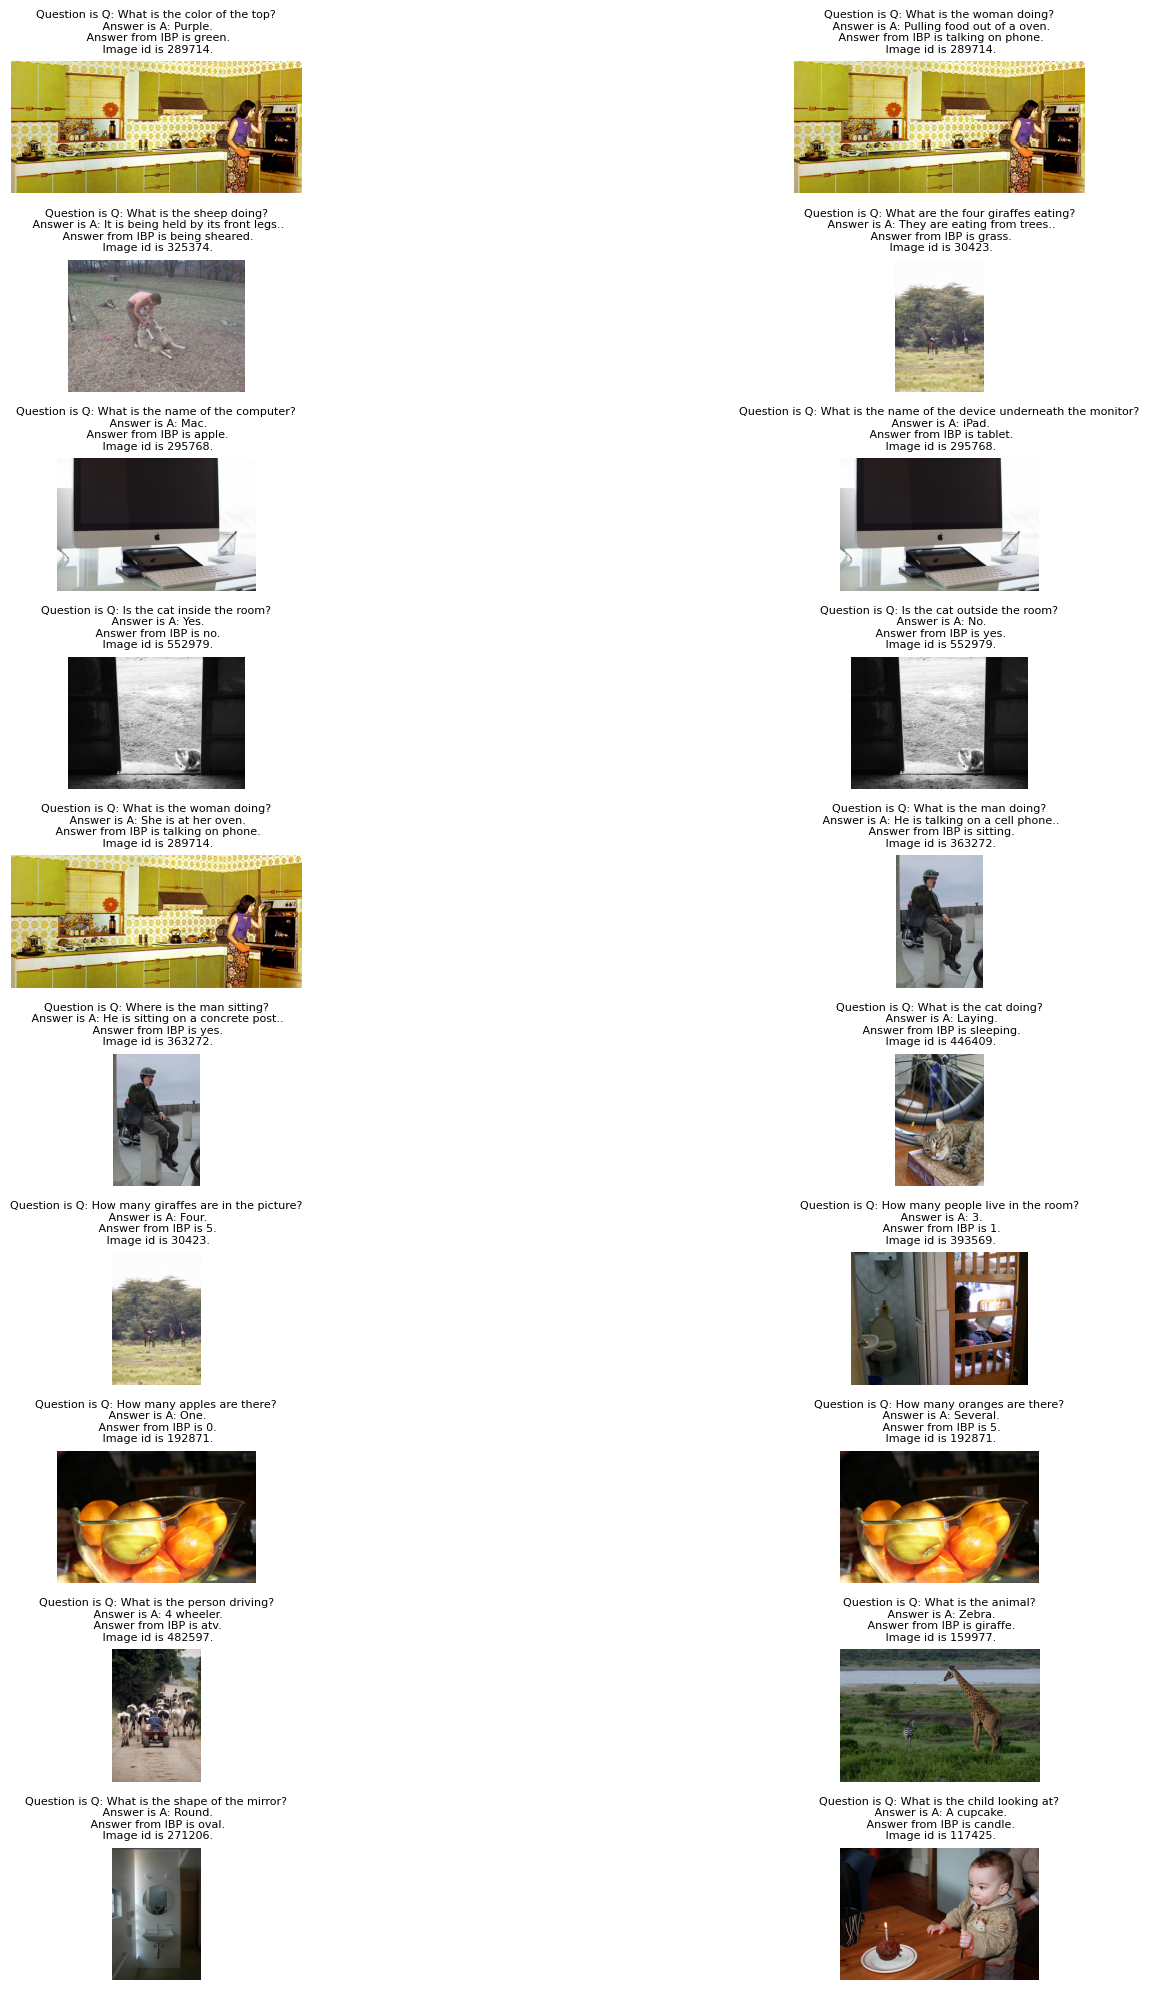

In [ ]:
plot_row_images(images[25:], titles[25:])